# SuperMarket Sales Prediction

### Objective:
- The primary goal of this project is to develop a predictive model that accurately forecasts the sales of products at various SuperMarkets. By analyzing the sales data from 2013, the model will help SuperMarkets understand the key factors that influence product sales, enabling better inventory management, marketing strategies, and overall business decisions.

### Data Description:
- The dataset comprises sales data for 1559 products across 10 different stores located in various cities. Each product and store have specific attributes that potentially affect sales.

### Steps for the Project:
- Understanding Data
- Exploratory Data Analysis (EDA)
- Missing Values
- Remove Skweness
- Outliers
- Feature Engineering
- Label Encoding
- Features Selection
- Model Development
- Model Deployment on Test DataSet
- Final Prediction

## Let's Start


### 1. Understanding Data

In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# To determine the number of unique values in each categorical feature
cf=[i for i in df.columns if len(df[i].unique())<25]
cf

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
def counts (feature):
    return df[feature].value_counts()
for i in cf:
    print(counts(i));

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64
Outlet_S

In [9]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

- To ensure consistency in the categorical values for the 'Product Fat Content' feature, we need to standardize the labels used for 'Low Fat' and 'Regular'. In the dataset, 'Low Fat' is represented by three different labels: 'Low Fat', 'LF', and 'low fat'. We will replace these variations with a single standard label 'Low Fat'. Similarly, we will ensure that 'Regular' is uniformly labeled.

### 2. Exploratory Data Analysis

**To enhance understanding and visualization of the categorical features in the dataset, we will create count plots for each of these features.**

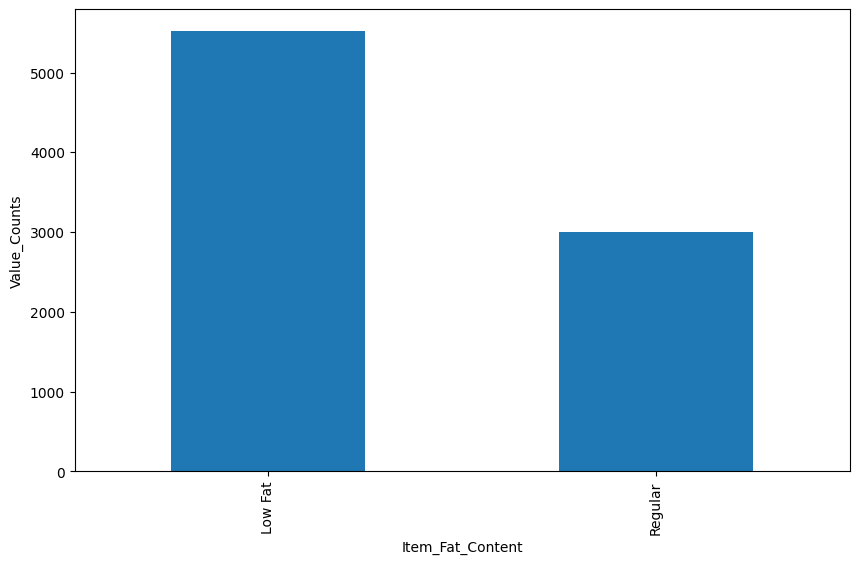

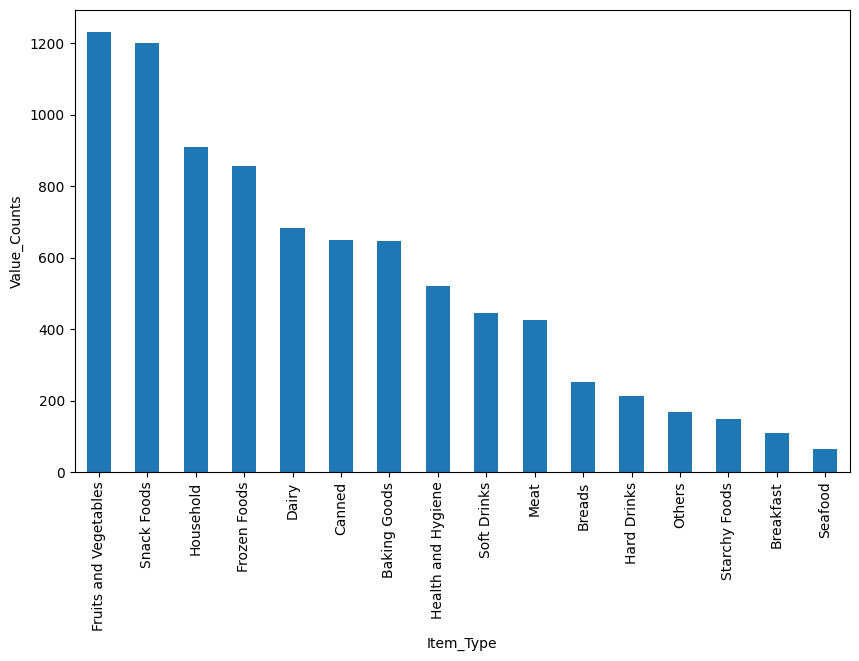

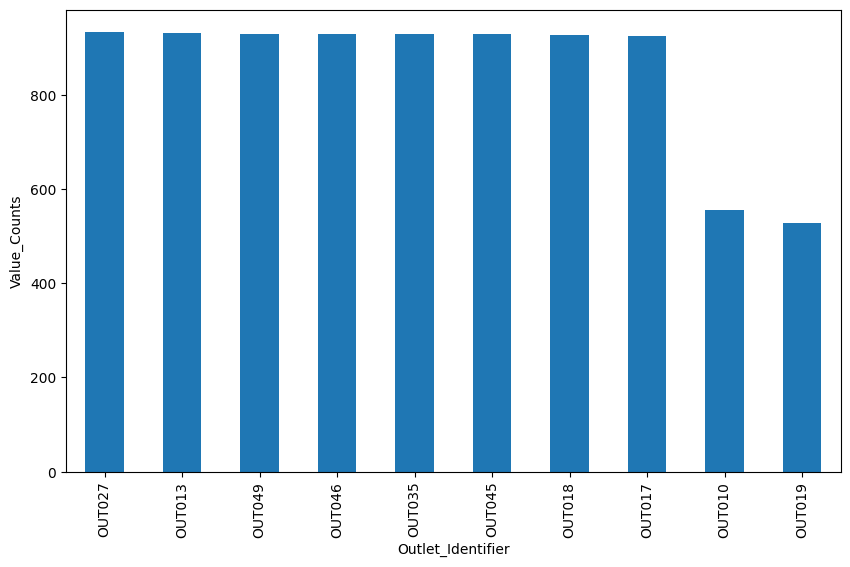

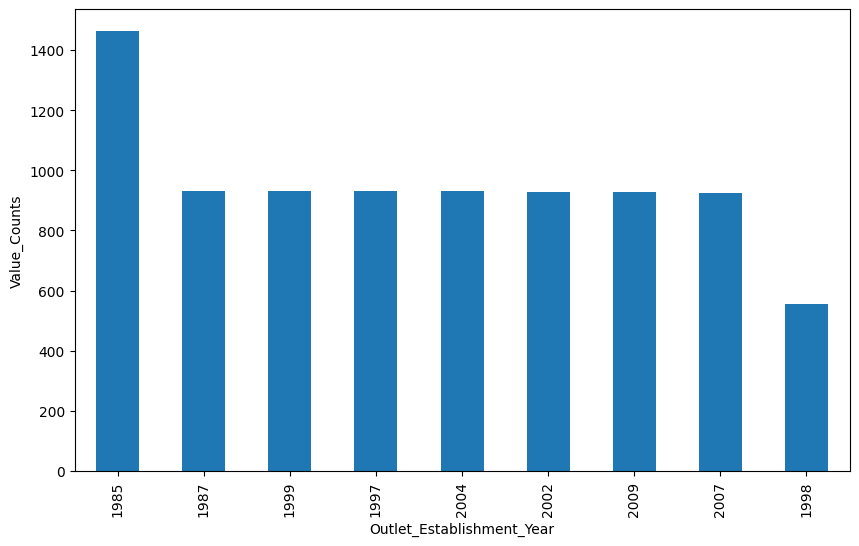

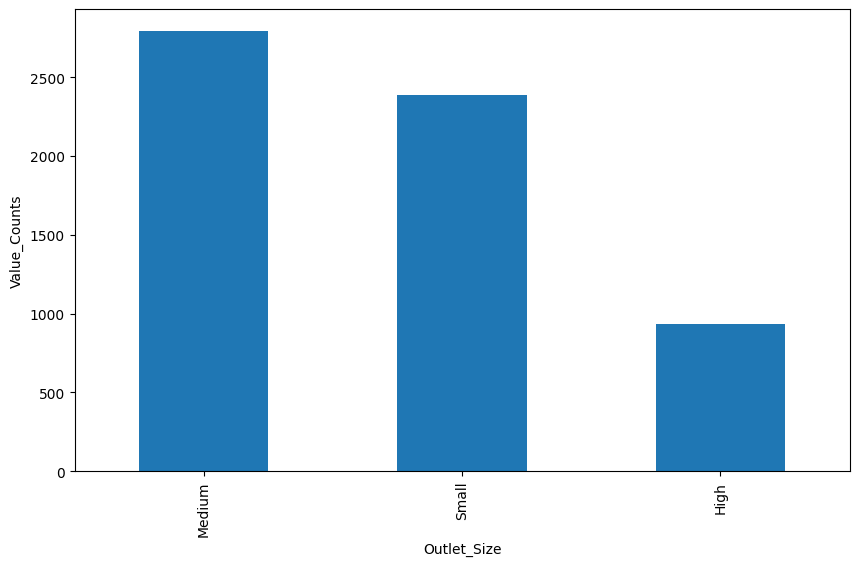

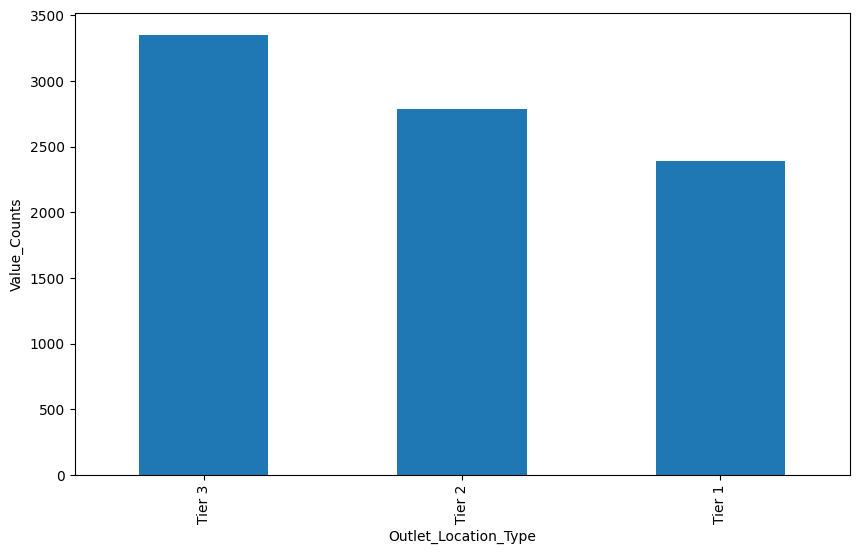

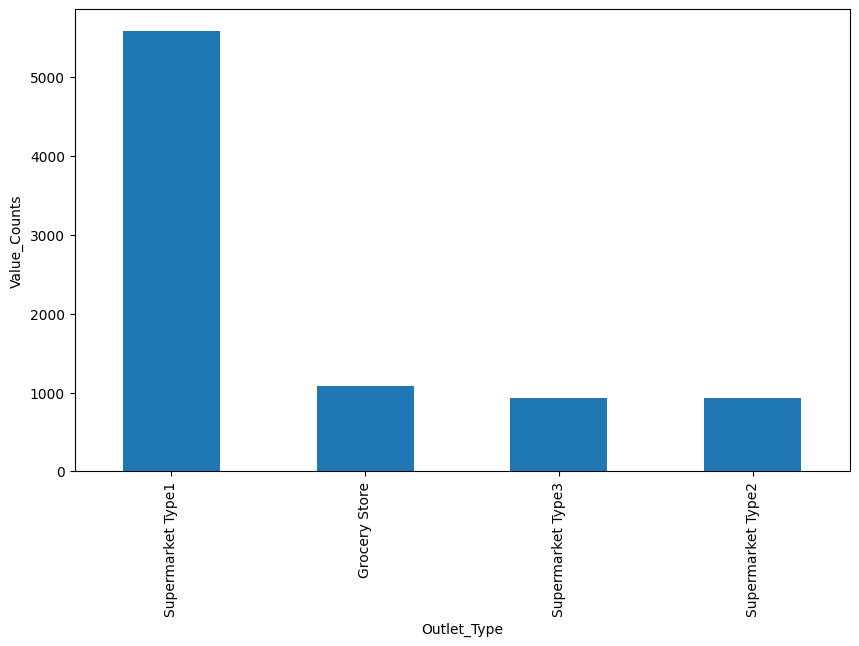

In [10]:
for i in cf:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Value_Counts')
    plt.show()

### 3. Missing Values

#### Outlet Size 

In [11]:
#As there is no zero visibility of any item in any kind of shopping centre
df['Item_Visibility'].replace(0,np.nan,inplace=True)

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df['Outlet_Size'].fillna('Unknown',inplace=True)

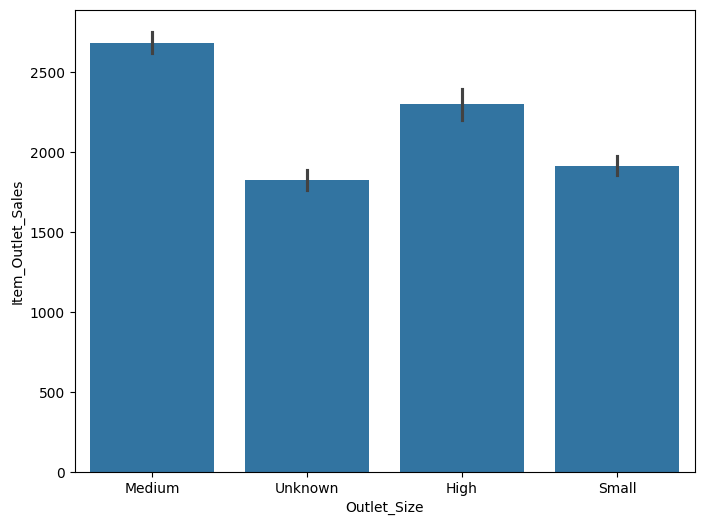

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])
plt.show()

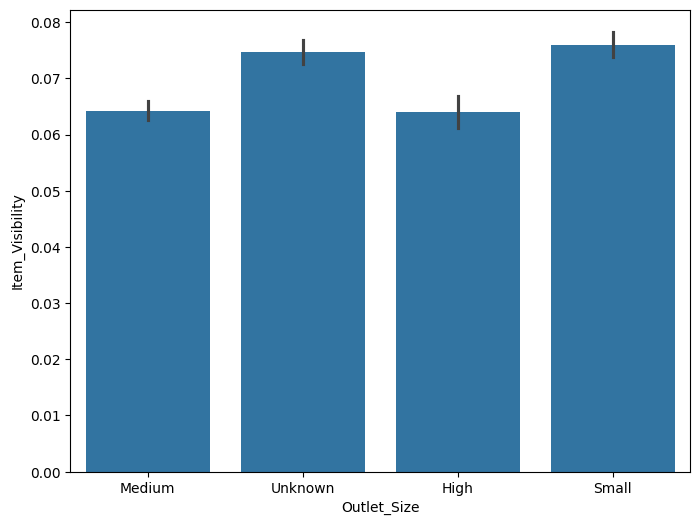

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Outlet_Size'],y=df['Item_Visibility'])
plt.show()

**Observations from the Graphs**
- ***Graph 1: Item_Outlet_Sales by Outlet Size***
  - *Stores with a small outlet size and those with an unknown outlet size generally have lower sales.*
  - *The sales patterns of stores with a small outlet size are similar to those with an unknown outlet size, suggesting a potential relationship or similarity between these categories.*

- ***Graph 2: Item_Visibility by Outlet Size***
  - *Stores with a small outlet size and those with an unknown outlet size generally exhibit higher product visibility.*
  - *The visibility patterns of stores with a small outlet size are similar to those with an unknown outlet size, indicating that these two categories might share common characteristics.*

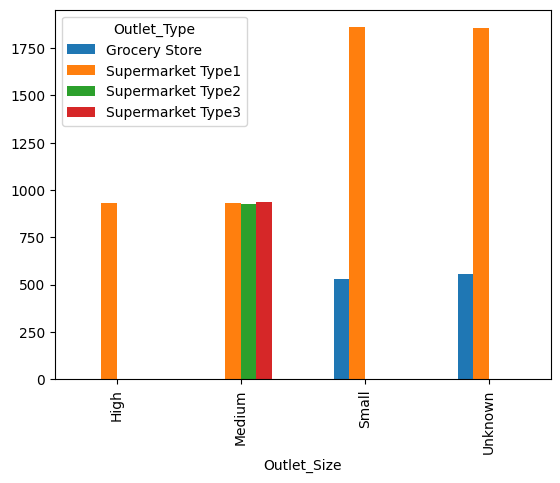

In [16]:
a=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
a.plot(kind='bar')
plt.show()

- Outlets with a small size are similar to those with an unknown size.
- Outlets with a small size are typically categorized as either Supermarket Type 1 or Grocery Store.

In [17]:
df1=df[df['Outlet_Size'] == 'Unknown']
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Unknown,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Unknown,Tier 3,Grocery Store,178.4344


**The dataframe further supports the observation that outlets with an unknown size are typically of type Grocery Store or Supermarket Type1. I will fill the missing values in the 'Outlet Size' column with 'Small', as there is sufficient evidence to justify this imputation.**

In [18]:
df['Outlet_Size'].replace('Unknown','Small',inplace=True)

#### Item Visibility

In [19]:
df0=df[df['Item_Identifier'] == 'FDU28']
df0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
6362,FDU28,NaN,Regular,0.164439,Frozen Foods,188.4214,OUT019,1985,Small,Tier 1,Grocery Store,376.8428
6419,FDU28,19.2,Regular,0.094301,Frozen Foods,187.5214,OUT018,2009,Medium,Tier 3,Supermarket Type2,1695.7926
7597,FDU28,NaN,Regular,0.093464,Frozen Foods,189.1214,OUT027,1985,Medium,Tier 3,Supermarket Type3,2261.0568
8419,FDU28,19.2,Regular,0.093918,Frozen Foods,189.8214,OUT046,1997,Small,Tier 1,Supermarket Type1,942.1070


- If you look the above dataframe for particular identifier, values for item visibility are same for outlet of type supermarket and for grocery store the value is old value + 0.1

In [20]:
df['Outlet_Type1'] = df['Outlet_Type']

In [21]:
dict={'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket','Supermarket Type3':'Supermarket','Grocery Store':'Grocery Store'}
df['Outlet_Type1'] = df['Outlet_Type1'].map(dict)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Type1                    0
dtype: int64

In [22]:
df['Item_Visibility'].fillna(df.groupby(['Item_Identifier','Outlet_Type1'])['Item_Visibility'].transform('mean'),inplace=True)

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                38
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Type1                    0
dtype: int64

- After filling the missing value wrt item identifier and outlet type there are several values which are still nan because if for particular identifier if there is only one type of outlet type which is nan we cannot take mean of it and fill that value

In [24]:
df7=df[df['Item_Visibility'].isnull()]
df7.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
8486,FDR20,20.00,Regular,NaN,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744,Grocery Store
5881,NCP17,19.35,Low Fat,NaN,Health and Hygiene,65.3168,OUT010,1998,Small,Tier 3,Grocery Store,191.7504,Grocery Store
8480,FDQ58,NaN,Low Fat,NaN,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,Grocery Store
3163,FDF58,13.30,Low Fat,NaN,Snack Foods,62.1510,OUT010,1998,Small,Tier 3,Grocery Store,63.2510,Grocery Store
6979,NCK17,NaN,Low Fat,NaN,Health and Hygiene,40.3480,OUT019,1985,Small,Tier 1,Grocery Store,79.8960,Grocery Store


- All missing value corresponds to outlet of type grocery store.
- 
As we have observed that item visibility for grocery store is plus 0.1 the value for supermarket for particular item identifier

In [25]:
df['Item_Visibility'] = (df.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()+0.1)))

#### Item Weight

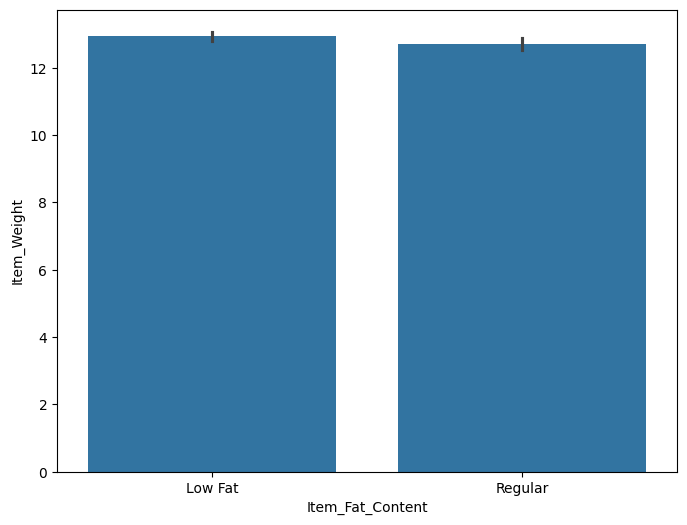

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=df["Item_Fat_Content"],y=df['Item_Weight'])
plt.show()

In [27]:
df3=df[df['Item_Identifier'] == 'FDA08']
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
192,FDA08,11.85,Regular,0.050187,Fruits and Vegetables,164.1526,OUT045,2002,Small,Tier 2,Supermarket Type1,3124.5994,Supermarket
3355,FDA08,11.85,Regular,0.050085,Fruits and Vegetables,164.7526,OUT046,1997,Small,Tier 1,Supermarket Type1,1315.6208,Supermarket
3619,FDA08,11.85,Regular,0.050368,Fruits and Vegetables,163.8526,OUT017,2007,Small,Tier 2,Supermarket Type1,1808.9786,Supermarket
7220,FDA08,NaN,Regular,0.049843,Fruits and Vegetables,164.2526,OUT027,1985,Medium,Tier 3,Supermarket Type3,3946.8624,Supermarket
7707,FDA08,NaN,Regular,0.087693,Fruits and Vegetables,162.5526,OUT019,1985,Small,Tier 1,Grocery Store,328.9052,Grocery Store


- If you look at the above two dataframe you can clearly say that item identifier is strongly correlated with item weight so i will fill the missing value of item weight wrt item identifier

In [28]:
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('median'),inplace=True)

In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Type1                 0
dtype: int64

- After filling the missing values based on the 'Outlet Size' criteria, there are still 4 unique item identifiers with missing values.

In [30]:
df4=df[df['Item_Weight'].isnull()]
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,Supermarket
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,Supermarket
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,Supermarket
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,Grocery Store


In [31]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

### 4. Removing the skewness

C:\Users\Viraj Chordiya\AppData\Local\Temp\ipykernel_23104\1183831686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins=8)


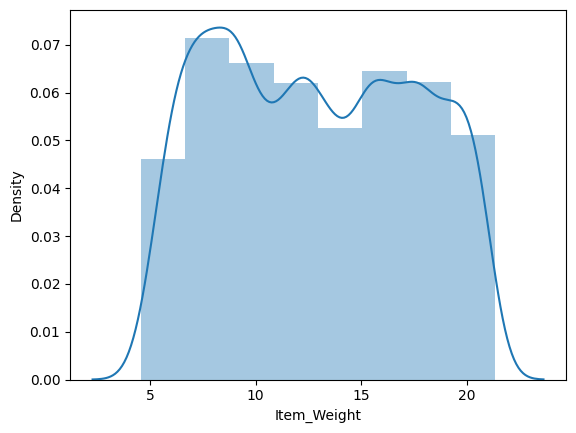

C:\Users\Viraj Chordiya\AppData\Local\Temp\ipykernel_23104\1183831686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins=8)


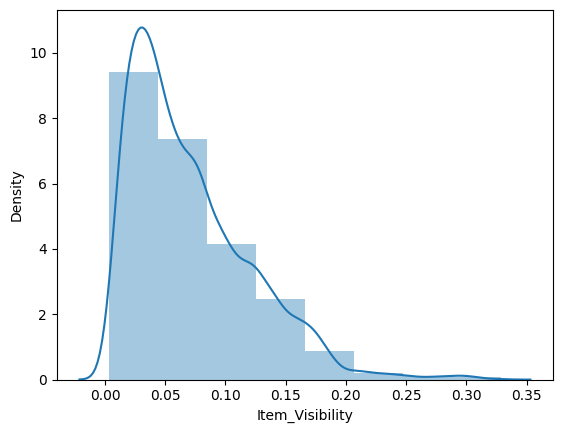

C:\Users\Viraj Chordiya\AppData\Local\Temp\ipykernel_23104\1183831686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins=8)


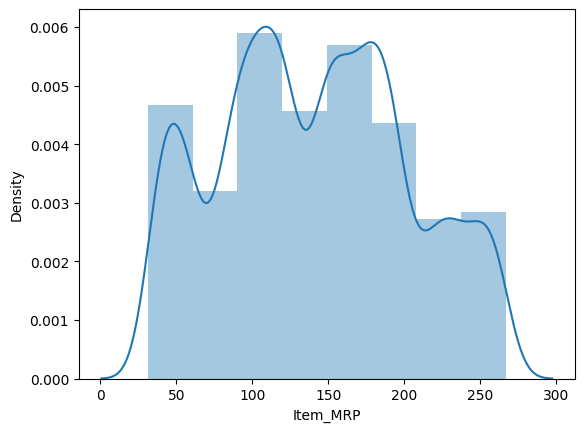

In [32]:
nf=['Item_Weight','Item_Visibility','Item_MRP']
for i in nf:
    sns.distplot(df[i],bins=8)
    plt.xlabel(i)
    plt.show()

- From above graphs, graph 2 is positively skewed so i will remove the skewness by performing log transformation

In [33]:
df['log_visibility'] = np.log(df['Item_Visibility'])

C:\Users\Viraj Chordiya\AppData\Local\Temp\ipykernel_23104\354720250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_visibility"],bins=8)


<Axes: xlabel='log_visibility', ylabel='Density'>

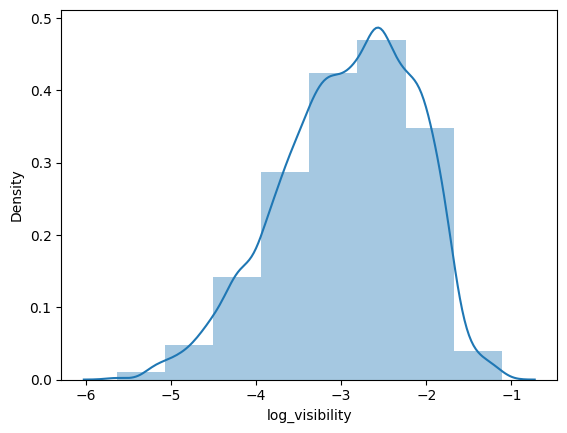

In [34]:
sns.distplot(df["log_visibility"],bins=8)

### 5. Outliers Detection and Removal

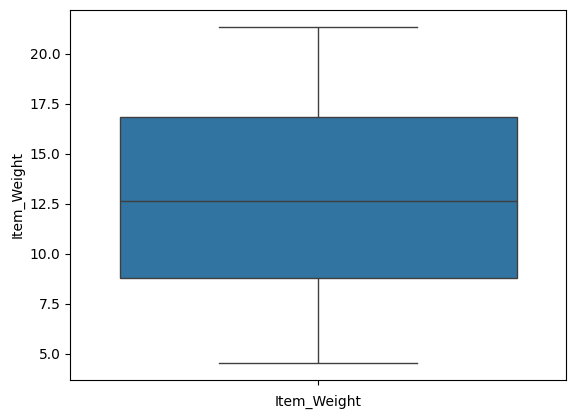

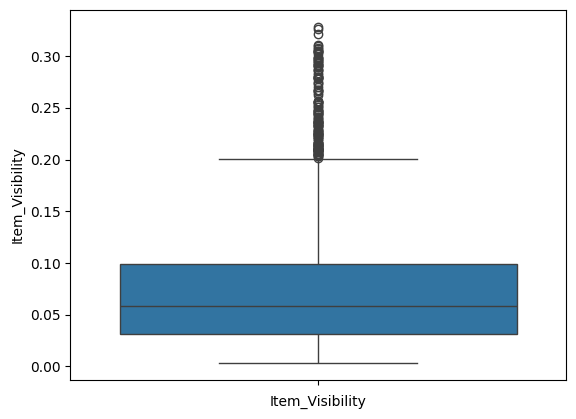

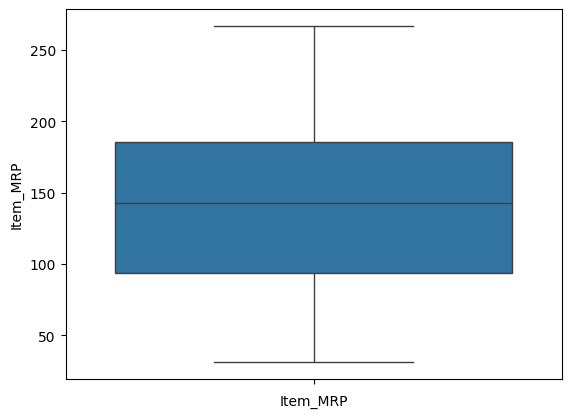

In [35]:
for i in nf:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

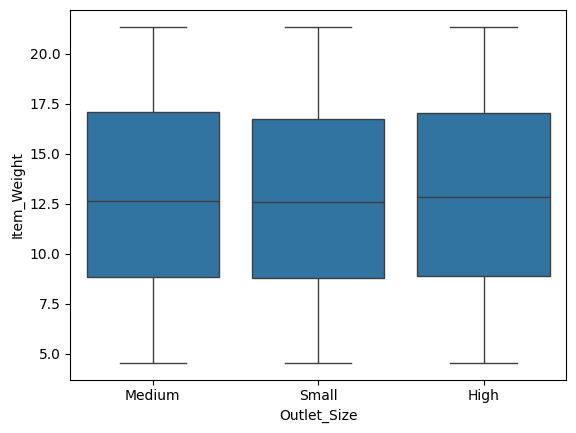

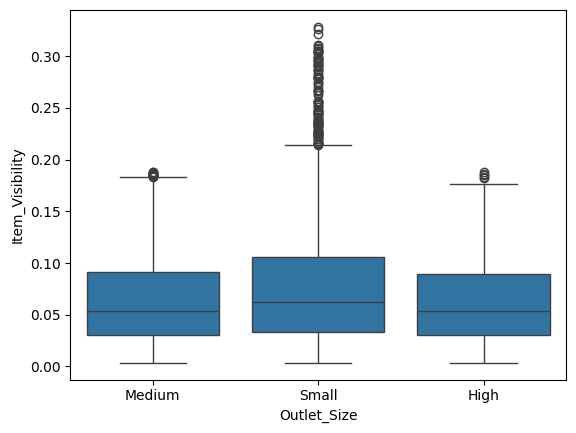

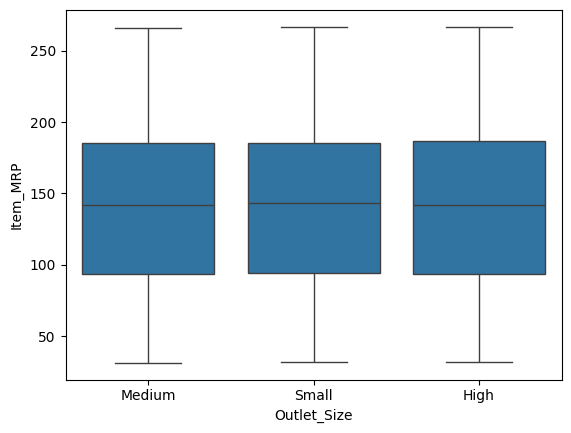

In [36]:
def plot_graph(x_axis_feature,type_of_graph,hue=None):
    for i in nf:
        if (type_of_graph=='boxplot'):
            sns.boxplot(x=df[x_axis_feature],y=df[i],hue=hue,data=df)
            plt.show()
        elif (type_of_graph=='barplot'):
             sns.barplot(x=df[x_axis_feature],y=df[i],data=df)
             plt.show()
        elif (type_of_graph=='catplot'):
             sns.barplot(x=df[x_axis_feature],y=df[i],hue=hue,data=df)
             plt.show()
plot_graph('Outlet_Size','boxplot')

- As there are outliers present in item visibility and item outlet sales i will try to remove the outliers 

In [37]:
def remove_outlier(column):
    std = np.std(df[column])
    mean = np.mean(df[column])
    outlier = []
    for i in df[column]:
        zscore = (i - mean) / std
        
        #Considering z>3 because z>3 sinifies 99.7%values fall in that region
        
        if(zscore > 3):
            outlier.append(i)
            minimum = np.min(outlier)
    return minimum

In [38]:
print(remove_outlier('Item_Visibility'))

0.223440258


In [39]:
q3 = df['Item_Visibility'].quantile(0.85)
q1 = df['Item_Visibility'].quantile(0.15)

#IQR Score


IQR = q3 - q1

print(q3 + 1.5 * IQR)

0.27990657485000003


In [40]:
m = (df['Item_Visibility'].mean())
s = (df['Item_Visibility'].std())
print(m+(3*s))

0.22212571858415506


In [41]:
a = df[(df['Outlet_Type'] == 'Grocery Store')]
c = a['Item_Visibility'].median()
c

0.101231721

In [42]:
df['Item_Visibility']=df['Item_Visibility'].where(df['Item_Visibility']<=0.2799065748499999,0.101231721)

### 6. Features Engineering


In [43]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,log_visibility
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.070105,140.992782,1997.831867,2181.288914,-2.920409
std,4.645016,0.048407,62.275067,8.371760,1706.499616,0.788455
min,4.555000,0.003575,31.290000,1985.000000,33.290000,-5.633875
25%,8.785000,0.031509,93.826500,1987.000000,834.247400,-3.457491
50%,12.650000,0.058182,143.012800,1999.000000,1794.331000,-2.844186
75%,16.850000,0.099119,185.643700,2004.000000,3101.296400,-2.311435
max,21.350000,0.279887,266.888400,2009.000000,13086.964800,-1.113550


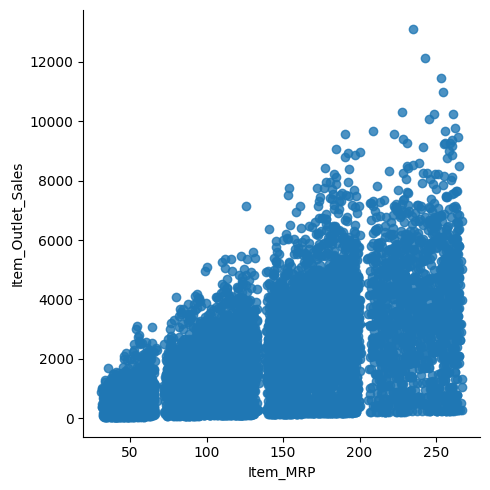

In [44]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.show()

In [45]:
# I will bin Item_MRP and Item_Weight into 3 categories using descriptive statistics
df['MRP_bin']=pd.cut(df['Item_MRP'],bins=[31,93.8265,143.0128,185.6437,267],labels=['cheap','affordable','slightly expensive','expensive'])
df['Weight_bin']=pd.cut(df['Item_Weight'],bins=[4,8.785,12.65,16.85,22],labels=['vlight','light','moderate','heavy'])

In [46]:
#Extracting first two letters of Item_Identifier
df['Item_Identifier_temp']=df['Item_Identifier'].str[:2]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC


- FD: Food
- DR: Drinks
- NC: Non Consumables

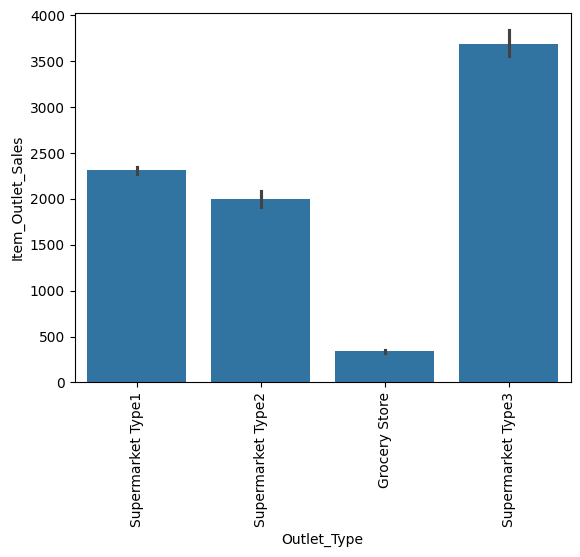

In [47]:
sns.barplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.show()

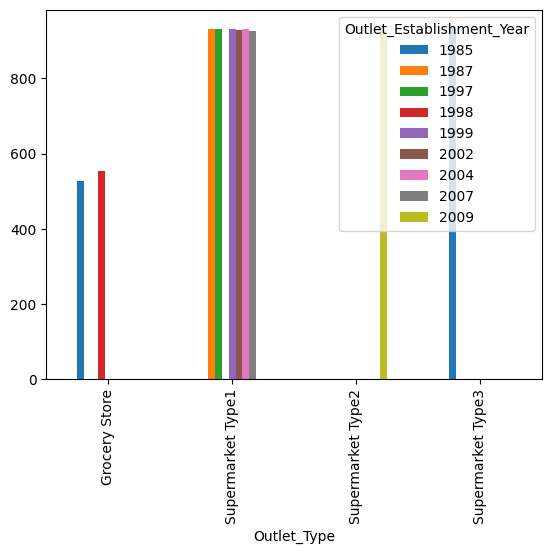

In [48]:
a=pd.crosstab(df['Outlet_Type'],df['Outlet_Establishment_Year'])
a.plot(kind='bar')
plt.show()

- A significant number of Supermarket Type 3 outlets were established in 1987, leading to a higher concentration of these stores in the market. This increased presence contributes to higher overall sales.
- Supermarket Type 3 often offers products at more competitive prices compared to Grocery Stores, making it a more attractive option for consumers seeking cost savings.

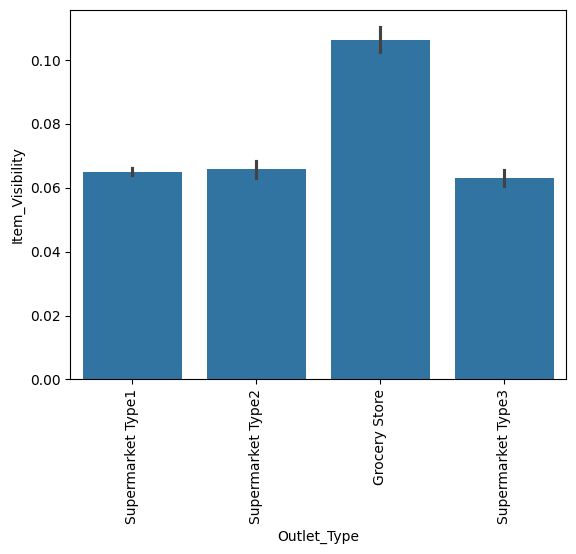

In [49]:
sns.barplot(x=df['Outlet_Type'],y=df['Item_Visibility'])
plt.xticks(rotation=90)
plt.show()

- The visibility of products is consistent across Supermarket Type 1, Type 2, and Type 3, likely due to uniform store interiors or the possibility that these supermarkets are essentially identical branches.

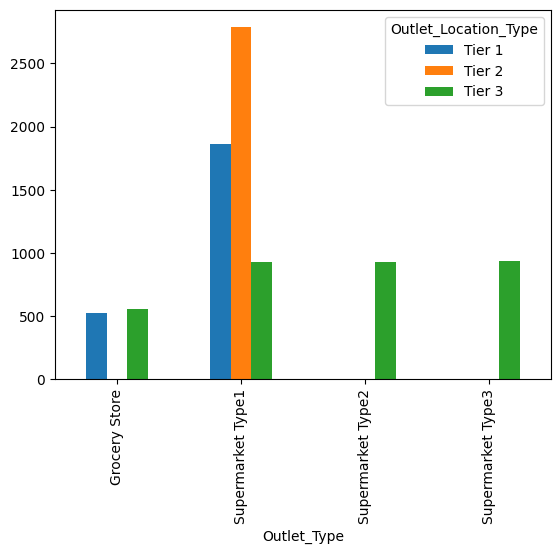

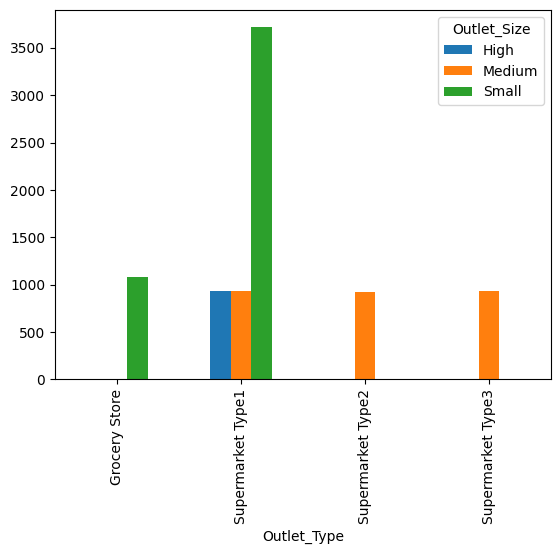

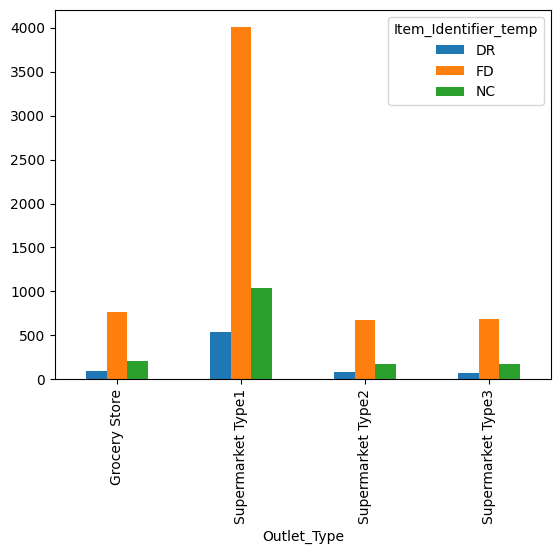

In [50]:
merge=['Outlet_Location_Type','Outlet_Size','Item_Identifier_temp']
for i in merge:
    a=pd.crosstab(df['Outlet_Type'],df[i])
    a.plot(kind='bar')
    plt.show()

- All of the graph proves that the behaviour of supermarket type 2 and 3 are similar so we will add those types

In [51]:
dict={'Supermarket Type1':'Supermarket Type1','Supermarket Type2':'Supermarket Type2','Supermarket Type3':'Supermarket Type2','Grocery Store':'Grocery Store'}
df['Outlet_Type']=df['Outlet_Type'].map(dict)

In [52]:
df['Outlet_Existence']=[2024-i for i in df['Outlet_Establishment_Year']]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,25
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,26
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC,37


In [53]:
df['Outlet_Status']=[0 if i<=2000 else 1 for i in df['Outlet_Establishment_Year']]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD,25,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR,15,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,25,0
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,26,0
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC,37,0


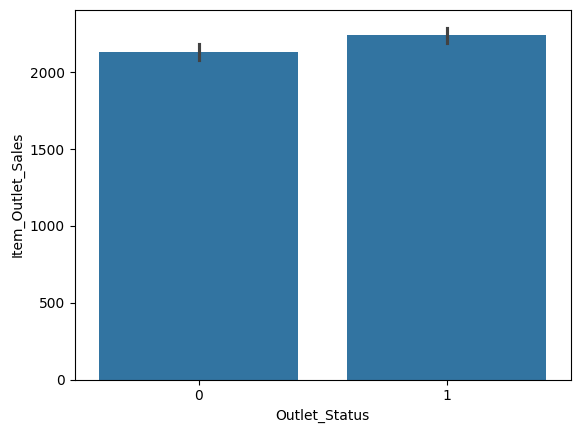

In [54]:
sns.barplot(x=df['Outlet_Status'],y=df['Item_Outlet_Sales'])
plt.show()

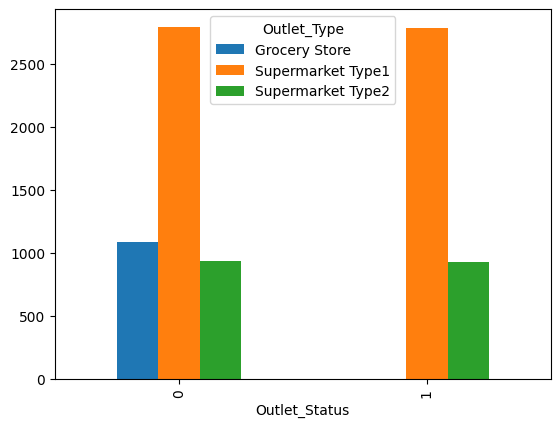

In [55]:
a=pd.crosstab(df['Outlet_Status'],df['Outlet_Type'])
a.plot(kind='bar')
plt.show()

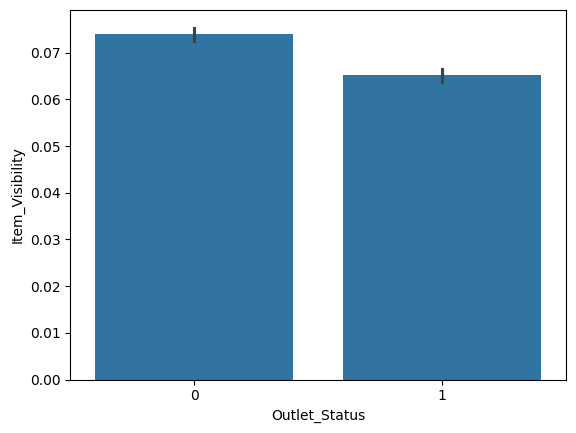

In [56]:
sns.barplot(x=df['Outlet_Status'],y=df['Item_Visibility'])
plt.show()

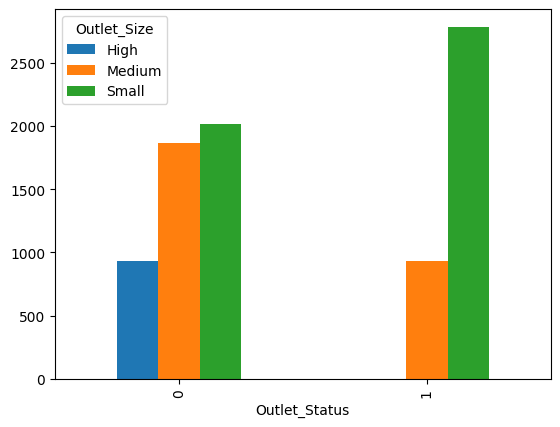

In [57]:
a=pd.crosstab(df['Outlet_Status'],df['Outlet_Size'])
a.plot(kind='bar')
plt.show()

In [58]:

# Since Non Consumables cannot be low fat or regular so  will create new var in item fat content for non consumable item identifier
df.loc[df['Item_Identifier_temp']=='NC','Item_Fat_Content']='No Fat'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3918
Regular    3006
No Fat     1599
Name: count, dtype: int64

In [59]:
#To check which item type are classified under DR , NC , FD
a=df.groupby('Item_Identifier_temp')['Item_Type'].value_counts()
a.head(60)

Item_Identifier_temp  Item_Type            
DR                    Soft Drinks               445
                      Hard Drinks               214
                      Dairy                     140
FD                    Fruits and Vegetables    1232
                      Snack Foods              1200
                      Frozen Foods              856
                      Canned                    649
                      Baking Goods              648
                      Dairy                     542
                      Meat                      425
                      Breads                    251
                      Starchy Foods             148
                      Breakfast                 110
                      Seafood                    64
NC                    Household                 910
                      Health and Hygiene        520
                      Others                    169
Name: count, dtype: int64

In [60]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [61]:
# Grouping item type into D(daily) and S(sometimes) according to daily need
dict={'Dairy':'D','Meat':'S','Fruits and Vegetables':'D','Breakfast':'S','Breads':'S','Starchy Foods':'S','Seafood':'S','Soft Drinks':'S','Household':'D','Baking Goods':'S','Snack Foods':'D','Frozen Foods':'D','Hard Drinks':'S','Canned':'D','Health and Hygiene':'S','Others':'S'}
df['Item_Frequency']=df['Item_Type'].map(dict)

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD,25,0,D
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR,15,1,S
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,25,0,S
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,26,0,D
4,NCD19,8.93,No Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC,37,0,D


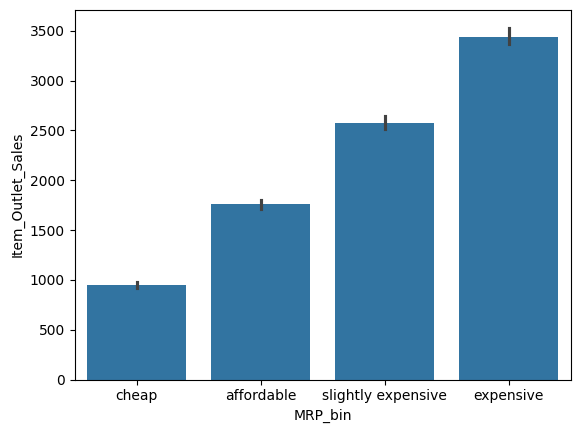

In [63]:
sns.barplot(x=df['MRP_bin'],y=df['Item_Outlet_Sales'])
plt.show()

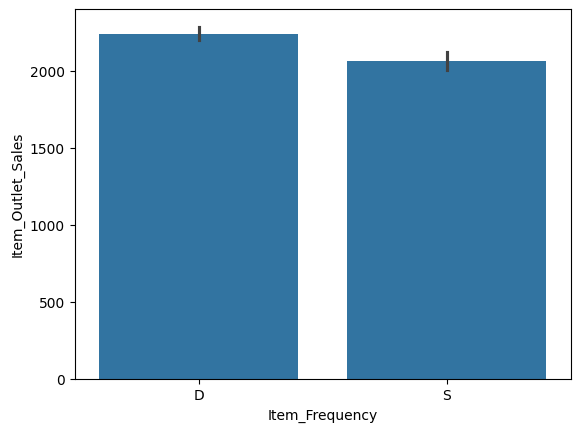

In [64]:
sns.barplot(x=df['Item_Frequency'],y=df['Item_Outlet_Sales'])
plt.show()

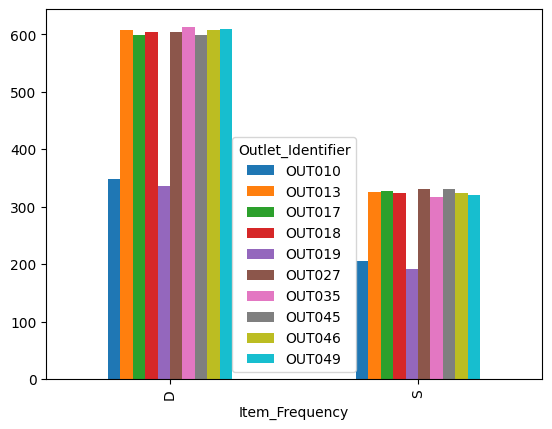

In [65]:
a=pd.crosstab(df['Item_Frequency'],df['Outlet_Identifier'])
a.plot(kind='bar')
plt.show()

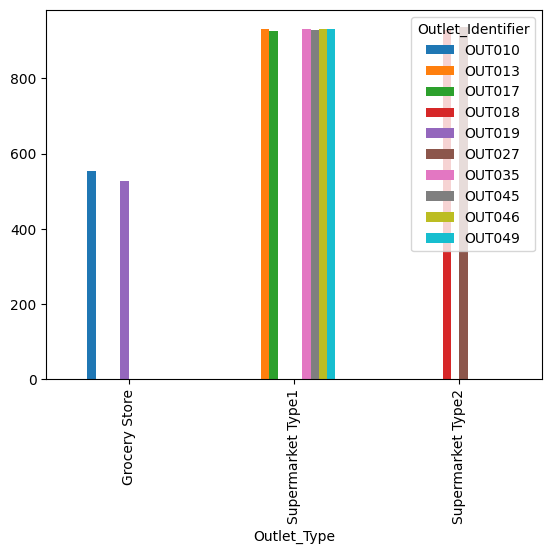

In [66]:
a=pd.crosstab(df['Outlet_Type'],df['Outlet_Identifier'])
a.plot(kind='bar')
plt.show()

### 7. Lable Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Identifier_temp']=le.fit_transform(df['Item_Identifier_temp'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Type1']=le.fit_transform(df['Outlet_Type1'])
dict={'Small':0,'Medium':1,'High':2}
df['Outlet_Size']=df['Outlet_Size'].map(dict)
dict1={'cheap':0,'affordable':1,'slightly expensive':2,'expensive':3}
df['MRP_bin']=df['MRP_bin'].map(dict1)
dict2={'vlight':0,'light':1,'moderate':2,'heavy':3}
df['Weight_bin']=df['Weight_bin'].map(dict2)
dict3={'Tier 3':0,'Tier 2':1,'Tier 1':2}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map(dict3)
dict4={'No Fat':0,'Low Fat':1,'Regular':2}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(dict4)
dict5={39:0,37:1,27:2,26:3,25:4,22:5,20:6,17:7,15:8}
df['Outlet_Existence']=df['Outlet_Existence'].map(dict5)
dict6={'D':1,'S':0}
df['Item_Frequency']=df['Item_Frequency'].map(dict6)
dict7={1985:0,1987:1,1997:2,1998:3,1999:4,2002:5,2004:6,2007:7,2009:8}
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].map(dict7)

In [68]:
# Final Dataset ready for training the model
pd.set_option('display.max_columns',None)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
0,FDA15,9.30,1,0.016047,4,249.8092,9,4,1,2,1,3735.1380,1,-4.132215,3,1,1,4,0,1
1,DRC01,5.92,2,0.019278,14,48.2692,3,8,1,0,2,443.4228,1,-3.948780,0,0,0,8,1,0
2,FDN15,17.50,1,0.016760,10,141.6180,9,4,1,2,1,2097.2700,1,-4.088756,1,3,1,4,0,0
3,FDX07,19.20,2,0.122911,6,182.0950,0,3,0,0,0,732.3800,0,-2.096299,2,3,1,3,0,1
4,NCD19,8.93,0,0.013217,9,53.8614,1,1,2,0,1,994.7052,1,-4.326277,0,1,2,1,0,1


In [69]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,1.165083,0.070105,7.226681,140.992782,4.722281,3.790684,0.546404,0.887129,1.091517,2181.288914,0.872932,-2.920409,1.093864,3.790684,0.435645,0.648715
std,4.645016,0.716317,0.048407,4.209990,62.275067,2.837201,2.730322,0.683084,0.812757,0.580790,1706.499616,0.333069,0.788455,0.522090,2.730322,0.495870,0.477400
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,-5.633875,0.000000,0.000000,0.000000,0.000000
25%,8.785000,1.000000,0.031509,4.000000,93.826500,2.000000,1.000000,0.000000,0.000000,1.000000,834.247400,1.000000,-3.457491,1.000000,1.000000,0.000000,0.000000
50%,12.650000,1.000000,0.058182,6.000000,143.012800,5.000000,4.000000,0.000000,1.000000,1.000000,1794.331000,1.000000,-2.844186,1.000000,4.000000,0.000000,1.000000
75%,16.850000,2.000000,0.099119,10.000000,185.643700,7.000000,6.000000,1.000000,2.000000,1.000000,3101.296400,1.000000,-2.311435,1.000000,6.000000,1.000000,1.000000
max,21.350000,2.000000,0.279887,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,2.000000,13086.964800,1.000000,-1.113550,2.000000,8.000000,1.000000,1.000000


In [70]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Type1', 'log_visibility',
       'MRP_bin', 'Weight_bin', 'Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status', 'Item_Frequency'],
      dtype='object')

### 8. Feature selection


In [71]:
y=df[['Item_Outlet_Sales']]
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'log_visibility',
       'MRP_bin', 'Weight_bin', 'Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status', 'Item_Frequency']]
x=df[['MRP_bin','Weight_bin','Item_Fat_Content','Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status']]

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

**Standard Scaling**

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']]=scaler.fit_transform(X_train[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']])
X_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']]=scaler.transform(X_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']])

### 9. Model Development

In [74]:
ya=y_train['Item_Outlet_Sales']
yb=y_test['Item_Outlet_Sales']
Xa=X_train[['Item_Frequency','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]
Xb=X_test[['Item_Frequency','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
logreg=LinearRegression()
from sklearn.linear_model import Ridge
r=Ridge()
from sklearn.linear_model import Lasso
l=Lasso()
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(random_state=0)
from sklearn.ensemble import RandomForestRegressor
log=RandomForestRegressor(random_state=5)
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(random_state=0,learning_rate=0.07,max_leaf_nodes=4)
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(GradientBoostingRegressor(random_state=0,learning_rate=0.07,max_leaf_nodes=4))

In [76]:
li2=['Linear','Ridge','Lasso','DecisionTree','RandomForest','Gradient','Bagging']

In [77]:
row=[]
for j in li2:
    if j=='Linear':
        logreg.fit(Xa,ya)
        final=logreg.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final))])
    elif j=='Ridge':
        r.fit(Xa,ya)
        final1=r.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final1))])
    elif j=='Lasso':
        l.fit(Xa,ya)
        final2=l.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final2))])
    elif j=='DecisionTree':
        dtc.fit(Xa,ya)
        final3=dtc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final3))])
    elif j=='RandomForest':
        log.fit(Xa,ya)
        final4=log.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final4))])
    elif j=='Gradient':
        gbc.fit(Xa,ya)
        final6=gbc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final6))])
    elif j=='Bagging':
        bc.fit(Xa,ya)
        final5=bc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final5))])

In [78]:
row

[['Linear', 1200.4203530521468],
 ['Ridge', 1200.4145103274914],
 ['Lasso', 1200.3661442127843],
 ['DecisionTree', 1577.1846455429745],
 ['RandomForest', 1164.9108070244904],
 ['Gradient', 1067.1349614975022],
 ['Bagging', 1068.9055873847285]]

#### Linear Regression

In [79]:
logreg=LinearRegression()
logreg.fit(Xa,ya)
pred=logreg.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred)))

1200.4203530521468


#### Ridge Regression

In [80]:
r=Ridge()
r.fit(Xa,ya)
pred0=r.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred0)))

1200.4145103274914


#### Lasso Regression

In [81]:
l=Lasso()
l.fit(Xa,ya)
pred1=l.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred1)))

1200.3661442127843


#### Decision Tree Regressor

In [82]:
dtc.fit(Xa,ya)
pred2=dtc.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred2)))

1577.1846455429745


#### Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
log=RandomForestRegressor(random_state=0,max_features=4)
log.fit(Xa,ya)
pred3=log.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred3)))

1162.3774388416136


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, squared=False)
cv_scores = cross_val_score(RandomForestRegressor(), Xa, ya, cv=10, scoring=scorer)

# Calculate the mean of the cross-validated scores
mean_cv_score = np.mean(cv_scores)
print(mean_cv_score)

1152.682846832275


**GridSearchCV**
- Hyperparameter Tuning with GridSearchCV
  - We performed hyperparameter tuning for the RandomForestRegressor using Grid Search with Cross-Validation to find the optimal hyperparameters for
    our model.
- Hyperparameters Tested:
    - n_estimators: Number of trees in the forest ([20, 60, 100, 120])
    - max_features: Fraction of features used for best split ([0.2, 0.4, 0.6, 0.8, 1.0])
    - max_depth: Maximum depth of the tree ([2, 8, None])
    - max_samples: Fraction of samples used to train each tree ([0.5, 0.75, 1.0])
- Using GridSearchCV, we evaluated these parameters with 5-fold cross-validation and identified the best combination as:
    - max_depth: 8
    - max_features: 0.6
    - max_samples: 0.5
    - n_estimators: 60
- This combination yielded the best performance for our model.

In [85]:
log=RandomForestRegressor(random_state=0,max_features=0.6,max_depth=8,max_samples=0.5)
log.fit(Xa,ya)
pred3=log.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred3)))

1079.0165098961302


#### Adaboost

In [86]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(random_state=0,n_estimators=10,learning_rate=0.1)
abc.fit(Xa,ya)
pred5=abc.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred5)))

1150.2849445906922


#### Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(max_leaf_nodes=6,min_samples_leaf=5)
gbc.fit(Xa,ya)
pred4=gbc.predict(Xb)
pp=gbc.predict(Xa)
print(np.sqrt(metrics.mean_squared_error(yb,pred4)))
# print(np.sqrt(metrics.mean_squared_error(ya,pp)))

1072.9889358302707


### 10. Model Deployment on Test DataSet

In [88]:
dft=pd.read_csv('test.csv')
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [89]:
dft['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
dft['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
dft['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [90]:
dft['Item_Visibility'].replace(0,np.nan,inplace=True)

In [91]:
dft.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility               353
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [92]:
dft['Outlet_Size'].fillna('Small',inplace=True)

In [93]:
dft['Outlet_Type1'] = dft['Outlet_Type']
dict={'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket','Supermarket Type3':'Supermarket','Grocery Store':'Grocery Store'}
dft['Outlet_Type1'] = dft['Outlet_Type1'].map(dict)
dft.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Outlet_Type1                   0
dtype: int64

In [94]:
dft['Item_Visibility'].fillna(dft.groupby(['Item_Identifier','Outlet_Type1'])['Item_Visibility'].transform('mean'),inplace=True)

In [95]:
dft['Item_Visibility']=(dft.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()+0.1)))

In [96]:
a=dft[dft['Outlet_Type1']=='Supermarket']
m=a['Item_Visibility'].mean()
print(m)
b=dft[dft['Outlet_Type1']=='Grocery Store']
m1=b['Item_Visibility'].mean()
print(m1)

0.06416203204468028
0.11417913043057262


In [97]:
dict={'Supermarket':0.06416203204468011,'Grocery Store':0.11417913043057272}
dft['Item_Visibility'].fillna(dft['Outlet_Type1'].map(dict),inplace=True)

In [98]:
dft['Item_Weight'].fillna(dft.groupby('Item_Identifier')['Item_Weight'].transform('median'),inplace=True)
dft['Item_Weight'].fillna(dft.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

In [99]:
dft.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Type1                 0
dtype: int64

In [100]:
dft['log_visibility']=np.log(dft['Item_Visibility'])

In [101]:
dft['MRP_bin']=pd.cut(dft['Item_MRP'],bins=[31,94.413,141.4155,186.0267,267],labels=['cheap','affordable','slightly expensive','expensive'])
dft['Weight_bin']=pd.cut(dft['Item_Weight'],bins=[4,8.64,12.36,16.71,22],labels=['vlight','light','moderate','heavy'])

In [102]:
dft['Item_Identifier_temp']=dft['Item_Identifier'].str[:2]
dict={'Supermarket Type1':'Supermarket Type1','Supermarket Type2':'Supermarket Type2','Supermarket Type3':'Supermarket Type2','Grocery Store':'Grocery Store'}
dft['Outlet_Type']=dft['Outlet_Type'].map(dict)
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Supermarket,-4.884245,affordable,heavy,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Supermarket,-3.258977,cheap,vlight,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Grocery Store,-2.306845,expensive,moderate,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Supermarket,-4.174142,slightly expensive,vlight,FD
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type2,Supermarket,-2.132005,expensive,moderate,FD


In [103]:
dft['Outlet_Existence']=[2024-i for i in dft['Outlet_Establishment_Year']]
dft['Outlet_Status']=[0 if i<=2000 else 1 for i in dft['Outlet_Establishment_Year']]
dft.loc[dft['Item_Identifier_temp']=='NC','Item_Fat_Content']='No Fat'

In [104]:
dict={'Dairy':'D','Meat':'S','Fruits and Vegetables':'D','Breakfast':'S','Breads':'S','Starchy Foods':'S','Seafood':'S','Soft Drinks':'S','Household':'D','Baking Goods':'S','Snack Foods':'D','Frozen Foods':'D','Hard Drinks':'S','Canned':'D','Health and Hygiene':'S','Others':'S'}
dft['Item_Frequency']=dft['Item_Type'].map(dict)

In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dft['Item_Identifier_temp']=le.fit_transform(dft['Item_Identifier_temp'])
dft['Item_Type']=le.fit_transform(dft['Item_Type'])
dft['Outlet_Type']=le.fit_transform(dft['Outlet_Type'])
dft['Outlet_Identifier']=le.fit_transform(dft['Outlet_Identifier'])
dft['Outlet_Type1']=le.fit_transform(dft['Outlet_Type1'])
dict={'Small':0,'Medium':1,'High':2}
dft['Outlet_Size']=dft['Outlet_Size'].map(dict)
dict1={'cheap':0,'affordable':1,'slightly expensive':2,'expensive':3}
dft['MRP_bin']=dft['MRP_bin'].map(dict1)
dict2={'vlight':0,'light':1,'moderate':2,'heavy':3}
dft['Weight_bin']=dft['Weight_bin'].map(dict2)
dict3={'Tier 3':0,'Tier 2':1,'Tier 1':2}
dft['Outlet_Location_Type']=dft['Outlet_Location_Type'].map(dict3)
dict4={'No Fat':0,'Low Fat':1,'Regular':2}
dft['Item_Fat_Content']=dft['Item_Fat_Content'].map(dict4)
dict5={39:0,37:1,27:2,26:3,25:4,22:5,20:6,17:7,15:8}
dft['Outlet_Existence']=dft['Outlet_Existence'].map(dict5)
dict6={'D':1,'S':0}
dft['Item_Frequency']=dft['Item_Frequency'].map(dict6)
dict7={1985:0,1987:1,1997:2,1998:3,1999:4,2002:5,2004:6,2007:7,2009:8}
dft['Outlet_Establishment_Year']=dft['Outlet_Establishment_Year'].map(dict7)

In [106]:
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
0,FDW58,20.750,1,0.007565,13,107.8622,9,4,1,2,1,1,-4.884245,1,3,1,4,0,1
1,FDW14,8.300,2,0.038428,4,87.3198,2,7,0,1,1,1,-3.258977,0,0,1,7,1,1
2,NCN55,14.600,0,0.099575,11,241.7538,0,3,0,0,0,0,-2.306845,3,2,2,3,0,0
3,FDQ58,7.315,1,0.015388,13,155.0340,2,7,0,1,1,1,-4.174142,2,0,1,7,1,1
4,FDY38,13.600,2,0.118599,4,234.2300,5,0,1,0,2,1,-2.132005,3,2,1,0,0,1


In [107]:
dft.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000
mean,12.675875,1.162999,0.070519,7.233410,141.023273,4.722760,3.78965,0.546383,0.887168,1.091533,0.872910,-2.924142,1.100158,3.78965,0.435487,0.645485
std,4.649403,0.720556,0.050641,4.219057,61.809091,2.837201,2.73036,0.683048,0.812824,0.580857,0.333103,0.784898,0.522051,2.73036,0.495864,0.478408
min,4.555000,0.000000,0.003591,0.000000,31.990000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-5.629209,0.000000,0.00000,0.000000,0.000000
25%,8.630000,1.000000,0.031333,4.000000,94.412000,2.000000,1.00000,0.000000,0.000000,1.000000,1.000000,-3.463095,1.000000,1.00000,0.000000,0.000000
50%,12.350000,1.000000,0.058132,6.000000,141.415400,5.000000,4.00000,0.000000,1.000000,1.000000,1.000000,-2.845035,1.000000,4.00000,0.000000,1.000000
75%,16.700000,2.000000,0.097464,10.000000,186.026600,7.000000,6.00000,1.000000,2.000000,1.000000,1.000000,-2.328268,1.000000,6.00000,1.000000,1.000000
max,21.350000,2.000000,0.410377,15.000000,266.588400,9.000000,8.00000,2.000000,2.000000,2.000000,1.000000,-0.890679,2.000000,8.00000,1.000000,1.000000


In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dft[['Item_Weight','Item_MRP','Item_Visibility','log_visibility',]]=scaler.fit_transform(dft[['Item_Weight','Item_MRP','Item_Visibility','log_visibility',]])
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
0,FDW58,1.736747,1,-1.243241,13,-0.536555,9,4,1,2,1,1,-2.497489,1,3,1,4,0,1
1,FDW14,-0.941252,2,-0.633748,4,-0.868937,2,7,0,1,1,1,-0.426634,0,0,1,7,1,1
2,NCN55,0.413880,0,0.573814,11,1.629848,0,3,0,0,0,0,0.786537,3,2,2,3,0,0
3,FDQ58,-1.153126,1,-1.088738,13,0.226697,2,7,0,1,1,1,-1.592703,2,0,1,7,1,1
4,FDY38,0.198780,2,0.949517,4,1.508110,5,0,1,0,2,1,1.009312,3,2,1,0,0,1


In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']]=scaler.fit_transform(df[['Item_Weight','Item_MRP','Item_Visibility','log_visibility']])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Item_Frequency
0,FDA15,-0.769777,1,-1.116779,4,1.747454,9,4,1,2,1,3735.1380,1,-1.537026,3,1,1,4,0,1
1,DRC01,-1.497482,2,-1.050031,14,-1.489023,3,8,1,0,2,443.4228,1,-1.304361,0,0,0,8,1,0
2,FDN15,0.995659,1,-1.102054,10,0.010040,9,4,1,2,1,2097.2700,1,-1.481904,1,3,1,4,0,0
3,FDX07,1.361665,2,1.090929,6,0.660050,0,3,0,0,0,732.3800,0,1.045283,2,3,1,3,0,1
4,NCD19,-0.849437,0,-1.175258,9,-1.399220,1,1,2,0,1,994.7052,1,-1.783170,0,1,2,1,0,1


In [110]:
X1=df[['Item_Frequency','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]
y1=df['Item_Outlet_Sales']

In [111]:
XX=dft[['Item_Frequency','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]

### 11. Final Prediction

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(max_leaf_nodes=6,min_samples_leaf=5)
gbc.fit(X1,y1)
predd=gbc.predict(XX)
predd=pd.DataFrame(predd,columns=['Item_Outlet_Sales'])

In [113]:
predd.to_csv('final.csv')